X
______
[0.         0.00011111 0.00022222 0.00033333 0.00044444 0.00055556
 0.00066667 0.00077778 0.00088889 0.001     ]
Mu
______
[0.00038344 0.00042365 0.00043759 0.00054488 0.00054881 0.00060276
 0.00064589 0.00071519 0.00089177 0.00096366]
Sigmoid Basis
______
[[2.11566946e-02 1.42513749e-02 1.24209484e-02 4.28290427e-03
  4.11851729e-03 2.40539283e-03 1.56400356e-03 7.82766016e-04
  1.33974109e-04 6.52886144e-05]
 [6.16121605e-02 4.20701179e-02 3.68000790e-02 1.28977504e-02
  1.24068274e-02 7.27129763e-03 4.73592982e-03 2.37404644e-03
  4.06866333e-04 1.98302916e-04]
 [1.66284372e-01 1.17706994e-01 1.03990647e-01 3.81765445e-02
  3.67592737e-02 2.17657498e-02 1.42489740e-02 7.17699637e-03
  1.23492693e-03 6.02147749e-04]
 [3.77286463e-01 2.88390332e-01 2.60660432e-01 1.07599550e-01
  1.03883374e-01 6.33105137e-02 4.20632306e-02 2.14875391e-02
  3.74196033e-03 1.82692169e-03]
 [6.47947476e-01 5.51787721e-01 5.17136369e-01 2.68079684e-01
  2.60438519e-01 1.70344271e-01 1.17689245e-

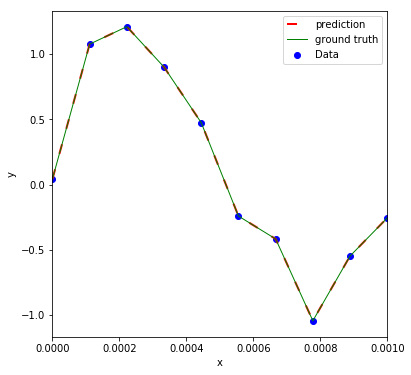

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from scipy.special import expit


from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

def sigmoid(x):
    return expit(x)

def create_sigmoid_basis(x,mu,M,N):
    
    
    X=np.zeros((M,N))
    #X[:,0]=np.ones(M)
    for i in range(N):
        X[:,i]=sigmoid(10000*(x-mu[i]))
    return X
    
def regression_sigmoid_basis(M,N):
    #Generate M random numbers 
    X=np.zeros((M,N))
    np.random.seed(0)
     
    #x=np.sort(np.random.uniform(0,0.001, M))
    x=np.linspace(0,0.001,M)
    print("X")
    print("______")
    print(x)
    
    mu=np.sort(np.random.uniform(0,0.001, N))
    print("Mu")
    
    print("______")
    print(mu)
    X=create_sigmoid_basis(x,mu,M,N)
    print("Sigmoid Basis")
    print("______")
    print(X)
    Y_original = np.sin(x*2000*np.pi)
    
      
    Y=np.sin(x*2000*np.pi) + np.random.normal(0,0.3,M)
    print("Y")
    print("______")
    print(Y_original)
    # Create linear regression object
    lm = linear_model.LinearRegression()
    
    ## Train the model using the training sets
    lm.fit(X, Y)
    pred=lm.predict(X)
    print("Predicted Y")
    print("______")
    print(pred)
    
    RSS=sum((Y-pred)*(Y-pred))
    print("RSS=",RSS)
    # The coefficients
    print('Coefficients: \n', lm.coef_)
    print("Intercept:",lm.intercept_)
    
    #plot the figure for training data
    plt.figure(figsize=(6,6))
    plt.xlim(0,0.001)
    plt.scatter(x,Y,color='b',label="Data")
    plt.plot(x,pred,color='r',linewidth=2,label="prediction",linestyle="--", dashes=(5,8))
    #plt.plot(x,pred,color='r',linewidth=2,label="prediction")
    
    plt.plot(x,Y,color='g',linewidth=1,label="ground truth")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
    ''''
    #plot the figure for test data
    x_range=np.sort(np.random.uniform(0,0.001, 20))
    X_test=create_sigmoid_basis(x_range,mu,x_range.shape[0],N)
    y_range= np.sin(x_range*2000*np.pi) + np.random.normal(0,0.3,x_range.shape[0])
    plt.figure(figsize=(6,6))
    plt.xlim(0,0.001)
    plt.scatter(x_range,y_range,color='b',label="Data")
    pred=lm.predict(X_test)
    plt.plot(x_range,pred,color='r',linewidth=1,label="prediction")
    plt.plot(x_range,y_range,color='g',linewidth=1,label="ground truth")
    '''
    
regression_sigmoid_basis(10,2)
regression_sigmoid_basis(10,5)
regression_sigmoid_basis(10,10)

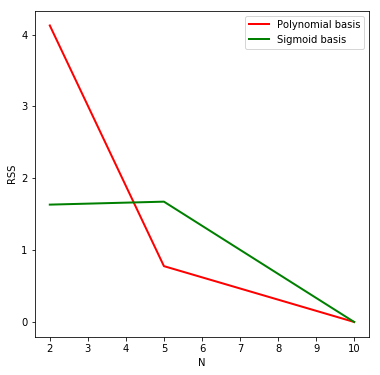

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
N=np.array([2,5,10])
poly_y=np.array([4.126,0.7769,0])
sig_y=np.array([1.633,1.6742,0])
plt.plot(N,poly_y,color='r',linewidth=2,label="Polynomial basis")
plt.plot(N,sig_y,color='g',linewidth=2,label="Sigmoid basis")
    
plt.legend()
plt.xlabel("N")
plt.ylabel("RSS")
plt.show()